<a href="https://colab.research.google.com/github/P4P3RCL1P/HopLogData/blob/main/Log_file_root_cause_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

#tokenization
from textblob import TextBlob

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
RAW_LOG_DATA_WITH_ERRORS = 'https://raw.githubusercontent.com/P4P3RCL1P/HopLogData/main/3-27-22.txt'

RAW_LOG_DATA_WITHOUT_ERRORS = 'https://github.com/P4P3RCL1P/HopLogData/blob/main/3-28-22.txt#L29'

train = pd.read_csv(RAW_LOG_DATA_WITH_ERRORS, sep=' - ', header=None, names =["Time", "Action", "Logging Text", "isError"])
train.fillna("", inplace = True)
train.head(60)

,Time,Action,Logging Text,isError
0,2022/03/27 11:46:49,Hop,Projects enabled,0
1,2022/03/27 11:46:49,Hop,Enabling project : 'default',0
2,2022/03/27 11:47:45,Hop,Starting workflow,0
3,2022/03/27 11:47:45,demoLineage,Start of workflow execution,0
4,2022/03/27 11:47:45,demoLineage,Logging workflow information to Neo4j connecti...,0
5,2022/03/27 11:47:48,demoLineage,ERROR: Error logging to Neo4j:,1
6,2022/03/27 11:47:48,demoLineage,ERROR: org.neo4j.driver.exceptions.ServiceUnav...,1
7,2022/03/27 11:47:48,demoLineage,\tat org.neo4j.driver.GraphDatabase.routingDri...,1
8,2022/03/27 11:47:48,demoLineage,\tat org.apache.hop.neo4j.shared.NeoConnection...,1
9,2022/03/27 11:47:48,demoLineage,\tat org.apache.hop.neo4j.shared.NeoConnection...,1


In [ ]:
test = train.iloc[:, 0:3]

In [ ]:
train['Action'].describe()

count              79
unique              9
top       demoLineage
freq               33
Name: Action, dtype: object

In [ ]:
print(train.dtypes)

Time            object
Action          object
Logging Text    object
isError          int64
dtype: object


# Classification using RegEx

Using RegEx assumes knowledge of the system environment and of areas where issues can occur. Our question is whether we can perform classification of whether a line in our log file is an error with minimal knowledge of the system domain. This acts as an introduction for how we can classify whether something is an error or not, but our implemented machine learning models will show a greater accuracy even after passing over the log data once.


In [ ]:
regExErrorClass = test 

regList = [('Error'), ('ERROR:'), ('\tat ')]
for r in regList:
  regExErrorClass.loc[regExErrorClass['Logging Text'].str.contains(r[0], regex = False) == True, 'isError'] = 1
regExErrorClass['isError'] = regExErrorClass['isError'].replace("", 0)
regExErrorClass['isError'].fillna(0, inplace = True)


In [ ]:
regExErrorClass

,Time,Action,Logging Text,isError
0,2022/03/27 11:46:49,Hop,Projects enabled,0.0
1,2022/03/27 11:46:49,Hop,Enabling project : 'default',1.0
2,2022/03/27 11:47:45,Hop,Starting workflow,0.0
3,2022/03/27 11:47:45,demoLineage,Start of workflow execution,0.0
4,2022/03/27 11:47:45,demoLineage,Logging workflow information to Neo4j connecti...,1.0
...,...,...,...,...
74,2022/03/27 11:47:54,demoLineage,Finished action [DB CONNECTION ERRORS] (result...,1.0
75,2022/03/27 11:47:54,demoLineage,Finished action [Check DB connections] (result...,0.0
76,2022/03/27 11:47:54,demoLineage,Workflow execution finished,0.0
77,2022/03/27 11:47:54,Hop,Workflow execution has ended,0.0


In [ ]:
print("Classification metrics:")
y_pred = regExErrorClass['isError']
y_pred = y_pred.astype(np.int64)
y_true = train['isError']
y_true = y_true.astype(np.int64)

print(f"Accuracy score: {accuracy_score(y_true, y_pred)}")
print(f"F1 score: {f1_score(y_true, y_pred)}")
print(f"Recall: {recall_score(y_true, y_pred)} ")
print(f"Precision: {precision_score(y_true, y_pred)} ")


Classification metrics:
Accuracy score: 0.8354430379746836
F1 score: 0.8433734939759037
Recall: 0.8974358974358975 
Precision: 0.7954545454545454 


# NLP (Natural language processing) preprocessing strategy

In order to build our classification model, we need data to feed it. Log data presents an interesting problem since most of the data is presented in a string format. To combat this issue we introduce natural language processing which helps detect patterns in our logging text, and which can then be used in classification of where errors are present.

In [ ]:
train['Logging Text'] = train['Logging Text'].replace([None], [""], regex=True)
test['Logging Text'] = test['Logging Text'].replace([None], [""], regex=True)

In [ ]:
train.head(40)

,Time,Action,Logging Text,isError
0,2022/03/27 11:46:49,Hop,Projects enabled,0
1,2022/03/27 11:46:49,Hop,Enabling project : 'default',0
2,2022/03/27 11:47:45,Hop,Starting workflow,0
3,2022/03/27 11:47:45,demoLineage,Start of workflow execution,0
4,2022/03/27 11:47:45,demoLineage,Logging workflow information to Neo4j connecti...,0
5,2022/03/27 11:47:48,demoLineage,ERROR: Error logging to Neo4j:,1
6,2022/03/27 11:47:48,demoLineage,ERROR: org.neo4j.driver.exceptions.ServiceUnav...,1
7,2022/03/27 11:47:48,demoLineage,\tat org.neo4j.driver.GraphDatabase.routingDri...,1
8,2022/03/27 11:47:48,demoLineage,\tat org.apache.hop.neo4j.shared.NeoConnection...,1
9,2022/03/27 11:47:48,demoLineage,\tat org.apache.hop.neo4j.shared.NeoConnection...,1


In [ ]:
print(train['isError'].value_counts())

0    40
1    39
Name: isError, dtype: int64


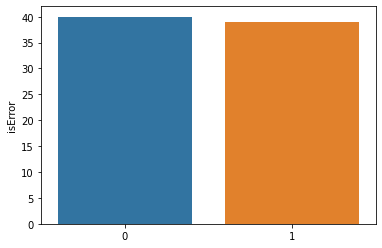

In [ ]:
sns.barplot(train['isError'].value_counts().index, train['isError'].value_counts())

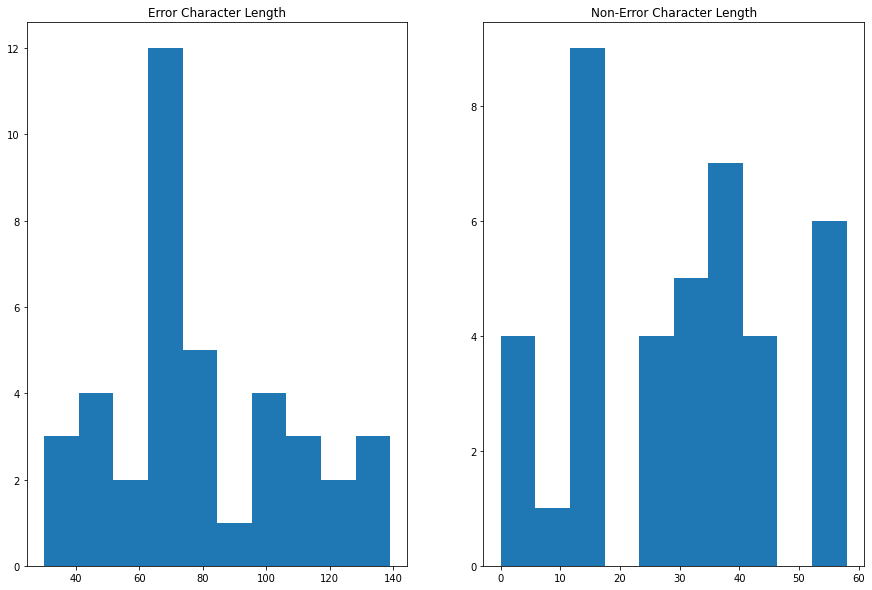

In [ ]:
errorCharLen = train[train['isError']==1]['Logging Text'].str.len()
nonErrorCharLen = train[train['isError']==0]['Logging Text'].str.len()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

ax1.hist(errorCharLen)
ax1.set_title("Error Character Length")

ax2.hist(nonErrorCharLen)
ax2.set_title("Non-Error Character Length")

plt.show()

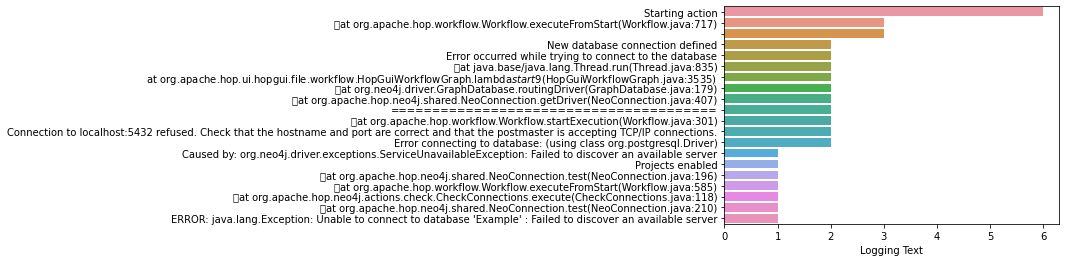

In [ ]:
sns.barplot(y = train['Logging Text'].value_counts()[:20].index, x=train['Logging Text'].value_counts()[:20])



**What is count vectorization?**

Count all the occurences in a document or paragraph and keep track of the count of these words in a 'bag-of-words' to be used for future analysis

In the below example we perform count vectorization without tokenization. Tokenization is used to break larger text into words or sentences, while additionaly normalizing the data to remove punctuation and filler words. Tokenization allows the model to better understand the sequence of words for a given line in our log file.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
loggingTextList = []
#test = ['Projects enabled' "Enabling project : 'default'" 'Starting workflow' 'Start of workflow execution' 'Logging workflow information to Neo4j connection : Example' 'ERROR: Error logging to Neo4j:' 'ERROR: org.neo4j.driver.exceptions.ServiceUnavailableException: Failed to discover an available server', '\tat org.neo4j.driver.GraphDatabase.routingDriver(GraphDatabase.java:179)', '\tat org.apache.hop.neo4j.shared.NeoConnection.getDriver(NeoConnection.java:407)', '\tat org.apache.hop.neo4j.shared.NeoConnection.getSession(NeoConnection.java:175)', '\tat org.apache.hop.neo4j.logging.xp.WorkflowLoggingExtensionPoint.callExtensionPoint(WorkflowLoggingExtensionPoint.java:87)', '\tat org.apache.hop.neo4j.logging.xp.WorkflowLoggingExtensionPoint.callExtensionPoint(WorkflowLoggingExtensionPoint.java:49)', '\tat org.apache.hop.core.extension.ExtensionPointMap.callExtensionPoint(ExtensionPointMap.java:147)', '\tat org.apache.hop.core.extension.ExtensionPointHandler.callExtensionPoint(ExtensionPointHandler.java:38)', '\tat org.apache.hop.workflow.Workflow.executeFromStart(Workflow.java:368)', '\tat org.apache.hop.workflow.Workflow.startExecution(Workflow.java:301)', '\tat org.apache.hop.ui.hopgui.file.workflow.HopGuiWorkflowGraph.lambda$start$9(HopGuiWorkflowGraph.java:3535)', '\tat java.base/java.lang.Thread.run(Thread.java:835)', 'exec(0, 0, Start)', 'Starting action', 'Starting action [Check DB connections]', 'exec(1, 0, Check DB connections)', 'Starting action', 'New database connection defined', 'ERROR: Cannot connect to database [dvdrental] (connection [dvdrental]). Exception : [org.apache.hop.core.exception.HopDatabaseException:', 'Error occurred while trying to connect to the database', '', 'Error connecting to database: (using class org.postgresql.Driver)' 'Connection to localhost:5432 refused. Check that the hostname and port are correct and that the postmaster is accepting TCP/IP connections.' '' ']' '=======================================']

for key, value in test.iterrows(): 
  #remove logging text that doesn't conain valuable keywords (ex: ==========, ], [)
  loggingTextList.append(value[2])
  try:
    vectorizer.fit([value[2]])
  except:
    continue
  else:
    vectorizer.fit([value[2]])
  #print(vectorizer.vocabulary_)




#may not need this after preprocessing for None, Boolean, and other unnecessary logging text values
loggingTextStr = "\n ".join(loggingTextList)
X = vectorizer.fit_transform(loggingTextList)
vector = vectorizer.vocabulary_
print(vector)


{'projects': 103, 'enabled': 53, 'enabling': 54, 'project': 102, 'default': 47, 'starting': 116, 'workflow': 134, 'start': 114, 'of': 96, 'execution': 65, 'logging': 90, 'information': 83, 'to': 125, 'neo4j': 92, 'connection': 41, 'example': 58, 'error': 56, 'org': 98, 'driver': 50, 'exceptions': 60, 'serviceunavailableexception': 112, 'failed': 69, 'discover': 49, 'an': 23, 'available': 28, 'server': 111, 'at': 27, 'graphdatabase': 75, 'routingdriver': 108, 'java': 86, '179': 3, 'apache': 25, 'hop': 77, 'shared': 113, 'neoconnection': 93, 'getdriver': 73, '407': 12, 'getsession': 74, '175': 2, 'xp': 136, 'workflowloggingextensionpoint': 135, 'callextensionpoint': 31, '87': 19, '49': 14, 'core': 43, 'extension': 66, 'extensionpointmap': 68, '147': 1, 'extensionpointhandler': 67, '38': 11, 'executefromstart': 63, '368': 10, 'startexecution': 115, '301': 6, 'ui': 128, 'hopgui': 79, 'file': 70, 'hopguiworkflowgraph': 80, 'lambda': 87, '3535': 9, 'base': 29, 'lang': 88, 'thread': 124, 'run

In [ ]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,118,147,175,179,196,210,301,324,325,3535,...,trying,ui,unable,using,were,while,with,workflow,workflowloggingextensionpoint,xp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**TF-IDF** Quantifies the importance or relevance of string representations in a document (Percentage of words contained in a given string)

Since longer lines of text can be assigned a higher weight than lines of text with only a short number of words in count vectorization we should prefer TF-IDF.

TF (Term Frequency) = # of times the term appears / number of terms

IDF  =  1 + log(number of documents (N) /n (number of documents a term has appeared in))

We can use this to quantify the frequency of keywords synonymous with errors





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf= False, norm='l1')
X = vectorizer.fit_transform(loggingTextList)
termFrequencyDf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
termFrequencyDf

,118,147,175,179,196,210,301,324,325,3535,...,trying,ui,unable,using,were,while,with,workflow,workflowloggingextensionpoint,xp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0


In [ ]:
highestErrorCount = termFrequencyDf.sort_values(by='error', ascending = False)
highestErrorCount

,'default,'exampl,0,1,2,3,4,9,9.324,9.325,...,unabl,use,workflow,workflow.java:301,workflow.java:368,workflow.java:414,workflow.java:585,workflow.java:717,workflowloggingextensionpoint.java:49,workflowloggingextensionpoint.java:87
47,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Further preprocessing to link words together and reduce it to its root word.

The textblob library is used to easily tokenize our data.

We tokenize the list to string runs of text that should be considered words:

**Examples that should be tokenized:**

*  org.apache.hop.core.extension.extensionpointhandler.callextensionpoint
*   org.neo4j.driver.exceptions.serviceunavailableexcept

In [ ]:
#install dependencies
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
#break larger text into smaller chunks (tokens)
def tokenize(loggingText):
  blob = TextBlob(loggingText.lower())
  tokens = blob.words
  words = [token.stem() for token in tokens]
  return words

vectorizer = CountVectorizer(tokenizer=tokenize)
testVector = vectorizer.fit_transform(loggingTextList)
trainVector = vectorizer.transform(loggingTextList)
testVectorDf = pd.DataFrame(testVector.toarray(), columns = vectorizer.get_feature_names_out())
testVectorDf

,'default,'exampl,0,1,2,3,4,9,9.324,9.325,...,while,with,workflow,workflow.java:301,workflow.java:368,workflow.java:414,workflow.java:585,workflow.java:717,workflowloggingextensionpoint.java:49,workflowloggingextensionpoint.java:87
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#for column in tokenizedDf.columns:
  #print(column)
tokenizedDf.shape

(79, 114)

# Count Vectorization with tokenization and removing stop words

Using textblob tokenization also includes **stemming**: removing and replacing suffixes to get to the root form of the word which is useful for words which contain multiple suffixes (database, databas(es), connection, connection(s), etc.)

**Remove stop words**

We want to be able to remove common words that don't pertain to our analysis (was, are, is, etc.). Initializing the 'stop_words' parameter can allow us to do so. 

In [ ]:
vectorizer = CountVectorizer(tokenizer = tokenize, stop_words = 'english')
trainVector = vectorizer.fit_transform(train['Logging Text'])
#testVector = vectorizer.fit_transform(loggingTextList)
#trainVector = vectorizer.transform(loggingTextList)
trainVectorDf = pd.DataFrame(trainVector.toarray(), columns = vectorizer.get_feature_names_out())
#testVectorDf
trainVectorDf

,'default,'exampl,0,1,2,3,4,9,9.324,9.325,...,unabl,use,workflow,workflow.java:301,workflow.java:368,workflow.java:414,workflow.java:585,workflow.java:717,workflowloggingextensionpoint.java:49,workflowloggingextensionpoint.java:87
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = vectorizer.transform(train['Logging Text']).todense()
y = train['isError'].values

In [ ]:
#Data set is to small to worry about train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)

#Count Vectorization Classification

In [ ]:
clfXGB = XGBClassifier(max_depth = 8, 
                       n_estimators= 2000, 
                       colsample_bytree=0.85, 
                       subsample=0.8, 
                       nthread=10, 
                       learning_rate =0.1,
                       gamma=0.4,
                       objective='binary:logistic',
                       eval_metric=['auc','logloss','error'],
                       early_stopping_round=50)

In [ ]:
clfXGB.fit(X, y, eval_set = [(X, y), (X, y)])

[0]	validation_0-auc:0.885577	validation_0-logloss:0.658947	validation_0-error:0.21519	validation_1-auc:0.885577	validation_1-logloss:0.658947	validation_1-error:0.21519
[1]	validation_0-auc:0.925962	validation_0-logloss:0.61853	validation_0-error:0.139241	validation_1-auc:0.925962	validation_1-logloss:0.61853	validation_1-error:0.139241
[2]	validation_0-auc:0.925962	validation_0-logloss:0.591694	validation_0-error:0.139241	validation_1-auc:0.925962	validation_1-logloss:0.591694	validation_1-error:0.139241
[3]	validation_0-auc:0.932372	validation_0-logloss:0.570165	validation_0-error:0.139241	validation_1-auc:0.932372	validation_1-logloss:0.570165	validation_1-error:0.139241
[4]	validation_0-auc:0.924038	validation_0-logloss:0.559669	validation_0-error:0.139241	validation_1-auc:0.924038	validation_1-logloss:0.559669	validation_1-error:0.139241
[5]	validation_0-auc:0.926603	validation_0-logloss:0.550186	validation_0-error:0.139241	validation_1-auc:0.926603	validation_1-logloss:0.550186	

XGBClassifier(colsample_bytree=0.85, early_stopping_round=50,
              eval_metric=['auc', 'logloss', 'error'], gamma=0.4, max_depth=8,
              n_estimators=2000, nthread=10, subsample=0.8)

In [ ]:
y_pred_xgb = clfXGB.predict(X)

In [ ]:
print(y_pred_xgb)

[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred_xgb)

array([[31,  9],
       [ 2, 37]])

In [ ]:
accuracy_score(y, y_pred_xgb)

0.8607594936708861

In [ ]:
f1_score(y, y_pred_xgb)

0.8705882352941177

#TF-IDF Classification

Performing TF-IDF results in a slightly higher performance result 

In [ ]:
#Using new tokenization and stop words on TF-IDF
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words ='english', use_idf=False)

#testTFIDF = vectorizer.fit_transform(loggingTextList)
X = vectorizer.fit_transform(train['Logging Text'])

#testTFIDFDf = pd.DataFrame(testTFID.toarray(), columns=vectorizer.get_feature_names_out())
#test = termFrequencyDf.sort_values(by='error', ascending = False)
#test

trainTFIDFDf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
trainTFIDFDf

,'default,'exampl,0,1,2,3,4,9,9.324,9.325,...,unabl,use,workflow,workflow.java:301,workflow.java:368,workflow.java:414,workflow.java:585,workflow.java:717,workflowloggingextensionpoint.java:49,workflowloggingextensionpoint.java:87
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.408248,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = train['isError'].values

In [ ]:
clfXGB = XGBClassifier(max_depth = 8, 
                       n_estimators= 2000, 
                       colsample_bytree=0.85, 
                       subsample=0.8, 
                       nthread=10, 
                       learning_rate =0.1,
                       gamma=0.4,
                       objective='binary:logistic',
                       eval_metric=['auc','logloss','error'],
                       early_stopping_round=50)

In [ ]:
clfXGB.fit(X, y, eval_set = [(X, y), (X, y)])

[0]	validation_0-auc:0.885577	validation_0-logloss:0.658947	validation_0-error:0.21519	validation_1-auc:0.885577	validation_1-logloss:0.658947	validation_1-error:0.21519
[1]	validation_0-auc:0.925962	validation_0-logloss:0.61853	validation_0-error:0.139241	validation_1-auc:0.925962	validation_1-logloss:0.61853	validation_1-error:0.139241
[2]	validation_0-auc:0.925962	validation_0-logloss:0.591694	validation_0-error:0.139241	validation_1-auc:0.925962	validation_1-logloss:0.591694	validation_1-error:0.139241
[3]	validation_0-auc:0.939423	validation_0-logloss:0.568997	validation_0-error:0.139241	validation_1-auc:0.939423	validation_1-logloss:0.568997	validation_1-error:0.139241
[4]	validation_0-auc:0.93109	validation_0-logloss:0.557872	validation_0-error:0.139241	validation_1-auc:0.93109	validation_1-logloss:0.557872	validation_1-error:0.139241
[5]	validation_0-auc:0.922115	validation_0-logloss:0.545272	validation_0-error:0.139241	validation_1-auc:0.922115	validation_1-logloss:0.545272	va

XGBClassifier(colsample_bytree=0.85, early_stopping_round=50,
              eval_metric=['auc', 'logloss', 'error'], gamma=0.4, max_depth=8,
              n_estimators=2000, nthread=10, subsample=0.8)

In [ ]:
y_pred_xgb = clfXGB.predict(X)

In [ ]:
confusion_matrix(y, y_pred_xgb)

array([[31,  9],
       [ 0, 39]])

In [ ]:
accuracy_score(y, y_pred_xgb)

0.8860759493670886

In [ ]:
f1_score(y, y_pred_xgb)

0.896551724137931

In [ ]:
scores = model_selection.cross_val_score(clfXGB, y_pred_xgb, y, cv = 5, scoring="f1")
scores

array([nan, nan, nan, nan, nan])

## TF-IDF visualization

([<matplotlib.axis.YTick at 0x7f82824e8050>,
 [Text(0, 0, 'connect'),
  Text(0, 0, 'error'),
  Text(0, 0, 'action'),
  Text(0, 0, 'start'),
  Text(0, 0, 'check'),
  Text(0, 0, 'neo4j'),
  Text(0, 0, '0'),
  Text(0, 0, 'databas'),
  Text(0, 0, 'db'),
  Text(0, 0, 'exec')])

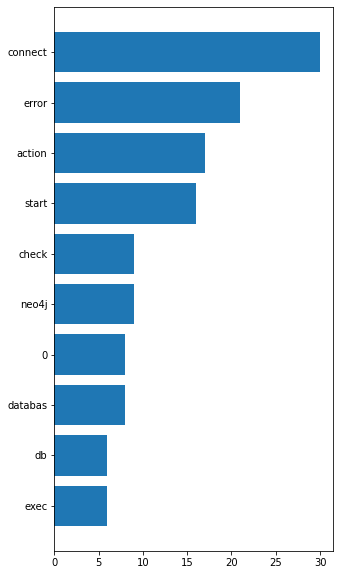

In [ ]:
#get 10 most prevalent keywords in logging text
featuresRank = list(zip(vectorizer.get_feature_names_out(), [x[0] for x in X.sum(axis=0).T.tolist()]))

featuresRank = np.array(sorted(featuresRank, key=lambda x:x[1], reverse=True))

n=10
plt.figure(figsize=(5,10))
plt.barh(-np.arange(n),featuresRank[:n, 1].astype(float), height =0.8)
plt.yticks(ticks=-np.arange(n), labels=featuresRank[:n, 0])

In [ ]:
for column in tokenizedDf.columns:
  print(column)

'default
'exampl
0
1
2
3
4
9
9.324
9.325
accept
action
an
and
are
at
avail
by
can
caus
chang
check
checkconnections.java:118
class
connect
correct
databas
db
defin
discov
durat
dvdrental
enabl
end
error
exampl
except
exec
execut
extensionpointhandler.java:38
extensionpointmap.java:147
fail
finish
for
graphdatabase.java:179
ha
hopguiworkflowgraph.java:3535
hostnam
in
inform
is
java.base/java.lang.thread.run
java.lang.except
localhost:5432
log
more
neo4j
neoconnection.java:175
neoconnection.java:196
neoconnection.java:210
neoconnection.java:407
new
not
occur
of
on
org.apache.hop.core.exception.hopdatabaseexcept
org.apache.hop.core.extension.extensionpointhandler.callextensionpoint
org.apache.hop.core.extension.extensionpointmap.callextensionpoint
org.apache.hop.neo4j.actions.check.checkconnections.execut
org.apache.hop.neo4j.logging.xp.workflowloggingextensionpoint.callextensionpoint
org.apache.hop.neo4j.shared.neoconnection.getdriv
org.apache.hop.neo4j.shared.neoconnection.getsess
org.a

## Comparing Frequency with Common Keywords

 How does the frequency between common keywords synonymous with the line being an error

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
#termSim = termFrequencyDf.corr().abs()

#upper = termSim.where(np.triu(np.ones(termSim.shape), k=1).astype(bool))


#dropFeatures = [column for column in upper.columns if any(upper[column] > 0.95)]


#termFrequencyDf.drop(dropFeatures, axis=1, inplace =True)
#termFrequencyDf

In [ ]:
test[['error', 'neo4j']]

,error,neo4j
47,0.816497,0.000000
5,0.816497,0.408248
39,0.707107,0.000000
32,0.577350,0.000000
71,0.447214,0.000000
...,...,...
28,0.000000,0.000000
26,0.000000,0.000000
23,0.000000,0.000000
22,0.000000,0.000000


In [ ]:
test[['error','connect']]

,error,connect
47,0.816497,0.408248
5,0.816497,0.000000
39,0.707107,0.000000
32,0.577350,0.577350
71,0.447214,0.447214
...,...,...
28,0.000000,0.554700
26,0.000000,0.000000
23,0.000000,0.500000
22,0.000000,0.000000


In [ ]:
test[['error', 'tcp/ip']]

,error,tcp/ip
47,0.816497,0.00000
5,0.816497,0.00000
39,0.707107,0.00000
32,0.577350,0.00000
71,0.447214,0.00000
...,...,...
28,0.000000,0.27735
26,0.000000,0.00000
23,0.000000,0.00000
22,0.000000,0.00000


In [ ]:
test[['error','db']]

,error,db
47,0.816497,0.000000
5,0.816497,0.000000
39,0.707107,0.000000
32,0.577350,0.000000
71,0.447214,0.447214
...,...,...
28,0.000000,0.000000
26,0.000000,0.000000
23,0.000000,0.000000
22,0.000000,0.000000


In [ ]:
test.error + test.neo4j

47    0.816497
5     1.224745
39    0.707107
32    0.577350
71    0.447214
        ...   
28    0.000000
26    0.000000
23    0.000000
22    0.000000
78    0.000000
Length: 79, dtype: float64

In [ ]:
errorsByCorrelation = pd.DataFrame({
    'error': test.error,
    'neo4j': test.neo4j,
    'database':test.db,
    'connection': test.connect,
    'error + neo4j': test.error + test.neo4j,
    'error + database': test.db + test.error,
    'error + connection': test.error + test.connect
})
errorsByCorrelation.head(20)

,error,neo4j,database,connection,error + neo4j,error + database,error + connection
47,0.816497,0.000000,0.000000,0.408248,0.816497,0.816497,1.224745
5,0.816497,0.408248,0.000000,0.000000,1.224745,0.816497,0.816497
39,0.707107,0.000000,0.000000,0.000000,0.707107,0.707107,0.707107
32,0.577350,0.000000,0.000000,0.577350,0.577350,0.577350,1.154701
71,0.447214,0.000000,0.447214,0.447214,0.447214,0.894427,0.894427
40,0.447214,0.000000,0.000000,0.447214,0.447214,0.447214,0.894427
25,0.447214,0.000000,0.000000,0.447214,0.447214,0.447214,0.894427
65,0.447214,0.447214,0.000000,0.447214,0.894427,0.447214,0.894427
27,0.408248,0.000000,0.000000,0.408248,0.408248,0.408248,0.816497
66,0.408248,0.408248,0.000000,0.408248,0.816497,0.408248,0.816497


In [ ]:
train.iloc[[47,5,39,32,71,40,25,65,27,66,42,6,42,6,72,68,74,64]]

,Time,Action,Logging Text,isError
47,2022/03/27 11:47:54,Check Neo4j Connection,ERROR: Error on connection: Example,1
5,2022/03/27 11:47:48,demoLineage,ERROR: Error logging to Neo4j:,1
39,2022/03/27 11:47:52,Query for recent changes,ERROR: An error occurred executing this action :,1
32,2022/03/27 11:47:50,Check DB connections,[1] connections were in error.,1
71,2022/03/27 11:47:54,demoLineage,Starting action [DB CONNECTION ERRORS],0
40,2022/03/27 11:47:52,Query for recent changes,Error occurred while trying to connect to the ...,1
25,2022/03/27 11:47:50,Check DB connections,Error occurred while trying to connect to the ...,1
65,2022/03/27 11:47:54,demoLineage,Starting action [NEO4J CONNECTION ERRORS],0
27,2022/03/27 11:47:50,Check DB connections,Error connecting to database: (using class org...,1
66,2022/03/27 11:47:54,demoLineage,"exec(4, 0, NEO4J CONNECTION ERRORS)",0


# Classification

Logistic Regression

In [ ]:
clf = LogisticRegression()

In [ ]:
scores = model_selection.cross_val_score(clf, trainVector, train['isError'], cv = 5, scoring="f1")
scores

array([1.        , 1.        , 0.54545455, 1.        , 0.92307692])

In [ ]:
clf.fit(testVector, train['isError'])

LogisticRegression()

Kmeans

In [ ]:
clfTFIDF = LogisticRegression()
scores = model_selection.cross_val_score(clfTFIDF, trainTFIDF, train['isError'], cv = 5, scoring='f1')
scores

array([1.        , 1.        , 0.54545455, 1.        , 0.92307692])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)
model.fit(train)
model.fit

<bound method KMeans.fit of KMeans(n_clusters=4)>

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(4):
  topWords =[terms[ind] for ind in order_centroids[i, :5]]
  print("Cluster {}: {}".format(i, ' '.join(topWords)))

Top terms per cluster:
Cluster 0: connect error databas neo4j check
Cluster 1: workflow org.neo4j.driver.graphdatabase.routingdriv org.apache.hop.neo4j.shared.neoconnection.getdriv org.apache.hop.neo4j.logging.xp.workflowloggingextensionpoint.callextensionpoint neoconnection.java:407
Cluster 2: start action connect workflow hopguiworkflowgraph.java:3535
Cluster 3: org.apache.hop.workflow.workflow.executefromstart workflow.java:717 workflow.java:368 workflow.java:414 workflow.java:585
